## Installing the Dependencies

In [8]:
! pip install langgraph

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


## Importing the Dependencies

In [9]:
from langgraph.graph import StateGraph, END
from typing import TypedDict, Optional, Literal
from IPython.display import Image, display


## Defining the State and Creating the Nodes

In [10]:

class MovieState(TypedDict):
    genre: Optional[str]
    movie: Optional[str]
    next_action: Optional[Literal["continue", "exit"]]

def ask_user(state: MovieState) -> MovieState:
    genre = input("Choose a genre (comedy/action): ").strip().lower()
    if genre in ["comedy", "action"]:
        state["genre"] = genre
    else:
        print(" Invalid input; please choose 'comedy' or 'action'.")
        state["genre"] = None
    return state

def suggest_movie(state: MovieState) -> MovieState:
    genre = state.get("genre")
    if genre == "comedy":
        state["movie"] = "The Grand Budapest Hotel"
    elif genre == "action":
        state["movie"] = "Mad Max: Fury Road"
    else:
        state["movie"] = "No suggestion available"
    print(f"🎥 Suggested movie: {state['movie']}")
    return state

def should_continue(state: MovieState) -> MovieState:
    choice = input("Type 'continue' for another recommendation or 'exit' to stop: ").strip().lower()
    state["next_action"] = choice
    return state

def decide_route(state: MovieState) -> str:
        return "ask_user" if state["next_action"] == "continue" else END


## Adding Nodes & Edges

In [11]:
# Initialize graph
graph = StateGraph(MovieState)

# Add nodes
graph.add_node("ask_user", ask_user)
graph.add_node("suggest_movie", suggest_movie)
graph.add_node("should_continue", should_continue)


# Conditional edges from should_continue
graph.add_conditional_edges(
    "should_continue",
    lambda state: state["next_action"],   
    {
        "continue": "ask_user",
        "exit": END
    }
)

# Define flow
graph.set_entry_point("ask_user")
graph.add_edge("ask_user", "suggest_movie")
graph.add_edge("suggest_movie", "should_continue")

## Compiling the Workflow

In [12]:
app = graph.compile()


## Invoking the Workflow

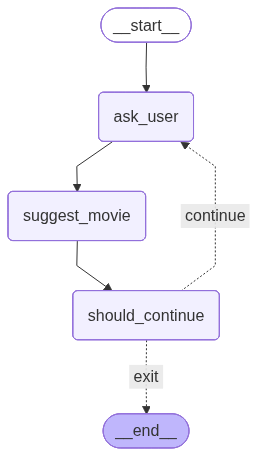

In [13]:
# Initial empty state
state = {"genre": None, "movie": None, "next_action": None}

display(Image(app.get_graph().draw_mermaid_png()))


In [14]:

# Start the conversation loop
app.invoke(state)

🎥 Suggested movie: The Grand Budapest Hotel
🎥 Suggested movie: Mad Max: Fury Road


{'genre': 'action', 'movie': 'Mad Max: Fury Road', 'next_action': 'exit'}